# Allen Brain Atlas Developing Human Brain Age (microarray)

Author: Moshe Silverstein <br/>
Date: 3-18 <br/>
Data Source: http://www.brainspan.org/static/download.html

In [1]:
import sys, datetime
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [3]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/BRAINSPAN atlas of the developing brain/Developnetal Transcriptome Dataset/Microarray/my_functions.py'>

# Versions Of Modules In Use

In [4]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.2.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
Tue Mar 06 15:45:43 2018 EST

# Path to Output Files

In [5]:
path = '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/BRAINSPAN atlas of the developing brain/Developnetal Transcriptome Dataset/Microarray/Output/'

# Load Data

In [6]:
matrix = pd.read_csv('input/gene_array_matrix_csv/expression_matrix.csv', header=None, index_col=0)

In [7]:
matrix.head()

,1,2,3,4,5,6,7,8,9,10,...,483,484,485,486,487,488,489,490,491,492
0,,,,,,,,,,,,,,,,,,,,,
1,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
2,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
3,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
4,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
5,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


In [8]:
matrix.shape

(17604, 492)

# Load Sample Metadata

In [9]:
sample_meta = pd.read_csv('input/gene_array_matrix_csv/columns_metadata.csv', index_col=0)

In [10]:
sample_meta.head()

,donor_id,donor_name,age,gender,structure_id,structure_acronym,structure_name
column_num,,,,,,,
1,13058,H376.IIA.51,8 pcw,M,10361,AMY,amygdaloid complex
2,13058,H376.IIA.51,8 pcw,M,10552,CGE,caudal ganglionic eminence
3,13058,H376.IIA.51,8 pcw,M,10173,DFC,dorsolateral prefrontal cortex
4,13058,H376.IIA.51,8 pcw,M,10391,DTH,dorsal thalamus
5,13058,H376.IIA.51,8 pcw,M,10294,HIP,hippocampus (hippocampal formation)


In [11]:
sample_meta.shape

(492, 7)

# Load Gene Metadata

In [12]:
gene_meta = pd.read_csv('input/gene_array_matrix_csv/rows_metadata.csv', index_col=0)

In [13]:
gene_meta.head()

,gene_id,ensembl_gene_id,gene_symbol,entrez_id
row_num,,,,
1,9633,ENSG00000101337,TM9SF4,9777
2,22692,ENSG00000114650,SCAP,22937
3,22952,ENSG00000113194,FAF2,23197
4,34497,ENSG00000150401,DCUN1D2,55208
5,35224,ENSG00000204444,APOM,55937


In [14]:
gene_meta.shape

(17604, 4)

# Map Sample Metadata to Sample ID

In [15]:
matrix.columns = sample_meta['age']

In [16]:
matrix.columns.name = ''

In [17]:
matrix.head()

,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,...,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs
0,,,,,,,,,,,,,,,,,,,,,
1,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
2,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
3,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
4,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
5,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


# Map Gene to Row

In [18]:
matrix.index = gene_meta['gene_symbol']

In [19]:
matrix.index.name = ''

In [20]:
matrix.head()

,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,...,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs
,,,,,,,,,,,,,,,,,,,,,
TM9SF4,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
SCAP,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
FAF2,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
DCUN1D2,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
APOM,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


# Save Unfiltered Matrix to file

In [21]:
filename = path+'aba_dev_mic_age_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [22]:
normalized_matrix = matrix.copy()

In [23]:
normalized_matrix.head()

,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,...,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs
,,,,,,,,,,,,,,,,,,,,,
TM9SF4,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
SCAP,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
FAF2,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
DCUN1D2,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
APOM,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


In [24]:
normalized_matrix.shape

(17604, 492)

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [25]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [26]:
normalized_matrix.shape

(17604, 492)

# Log2 Transform

In [27]:
normalized_matrix = mf.log2(normalized_matrix)

In [28]:
normalized_matrix.head()

,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,...,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs
TM9SF4,3.345675,3.371981,3.340337,3.362943,3.346489,3.395334,3.359887,3.366055,3.345868,3.339850,...,3.332134,3.289643,3.301567,3.223472,3.372179,3.278535,3.412726,3.251199,3.354667,3.412616
SCAP,3.233276,3.237386,3.304060,3.294862,3.297426,3.257068,3.236831,3.301358,3.254134,3.224252,...,3.224596,3.240556,3.249089,3.201138,3.192556,3.254925,3.195107,3.288613,3.270442,3.198590
FAF2,3.372871,3.403892,3.428109,3.397499,3.407846,3.375258,3.399547,3.437764,3.400483,3.373207,...,3.237522,3.254931,3.325494,3.204382,3.309070,3.288607,3.338065,3.232690,3.330426,3.296767
DCUN1D2,2.868602,2.951286,2.908010,3.043399,2.930796,2.993468,2.953034,2.940793,3.012463,2.778564,...,2.967643,3.094853,3.017747,2.947083,3.029124,3.032722,3.064700,2.944991,3.095783,2.959944
APOM,2.478723,2.639026,2.500940,2.592249,2.591270,2.528979,2.560676,2.617395,2.649429,2.520153,...,2.467812,2.517004,2.335137,2.615435,2.484850,2.453855,2.427115,2.483186,2.577378,2.421099


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [29]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [30]:
normalized_matrix.head()

,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,...,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs
TM9SF4,3.318568,3.346568,3.292878,3.339135,3.329387,3.372281,3.341785,3.324728,3.335019,3.332764,...,3.358100,3.314388,3.306802,3.263693,3.363503,3.260040,3.407774,3.275924,3.369965,3.401656
SCAP,3.203393,3.203926,3.255924,3.274452,3.279795,3.232974,3.215392,3.256086,3.239898,3.212979,...,3.252154,3.263849,3.252154,3.241446,3.189945,3.236746,3.195343,3.317638,3.286907,3.189799
FAF2,3.346478,3.377179,3.388459,3.372002,3.392332,3.353167,3.382003,3.404823,3.386221,3.370427,...,3.266258,3.278179,3.334060,3.244740,3.302921,3.271039,3.332929,3.256478,3.345235,3.285282
DCUN1D2,2.860570,2.938214,2.872029,3.035452,2.907134,2.974594,2.942766,2.903866,3.011122,2.777025,...,2.987686,3.115290,3.014339,2.976529,3.034074,3.014495,3.068267,2.956461,3.113786,2.959161
APOM,2.509154,2.667648,2.551769,2.590102,2.595067,2.553394,2.587694,2.652378,2.651379,2.556025,...,2.437397,2.454041,2.385200,2.571765,2.493744,2.469914,2.437794,2.478457,2.564279,2.455049


# Normalize Matrix (z-score the rows)

In [31]:
mf.zscore(normalized_matrix, 'row')

In [32]:
normalized_matrix.head()

,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,...,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs
TM9SF4,-0.868153,-0.310503,-1.379815,-0.458551,-0.652697,0.201592,-0.405766,-0.745484,-0.540520,-0.585422,...,-0.080832,-0.951408,-1.102505,-1.961070,0.026766,-2.033829,0.908480,-1.717469,0.155473,0.786635
SCAP,-0.402826,-0.393433,0.522454,0.848799,0.942920,0.118207,-0.191475,0.525315,0.240166,-0.233982,...,0.456048,0.662044,0.456048,0.267440,-0.639698,0.184660,-0.544624,1.609480,1.068194,-0.642270
FAF2,0.624915,1.368306,1.641432,1.242943,1.735208,0.786861,1.485113,2.037672,1.587237,1.204798,...,-1.317561,-1.028901,0.324207,-1.838591,-0.429790,-1.201792,0.296835,-1.554363,0.594816,-0.856899
DCUN1D2,-1.030641,-0.072109,-0.889183,1.128336,-0.455802,0.377021,-0.015906,-0.496147,0.827969,-2.062034,...,0.538639,2.113961,0.867682,0.400908,1.111325,0.869614,1.533448,0.153158,2.095387,0.186491
APOM,0.003779,2.016500,0.544946,1.031742,1.094794,0.565586,1.001163,1.822589,1.809903,0.598998,...,-0.907457,-0.696094,-1.570309,0.798876,-0.191915,-0.494525,-0.902421,-0.386035,0.703812,-0.683299


# Merge Like Column (by taking the mean)

In [33]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [34]:
normalized_matrix.shape

(17604, 27)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [35]:
mf.mapgenesymbols(normalized_matrix)

In [36]:
normalized_matrix.shape

# Merge Duplicate Genes By Rows

In [37]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [38]:
normalized_matrix.shape

# Histogram of First Sample

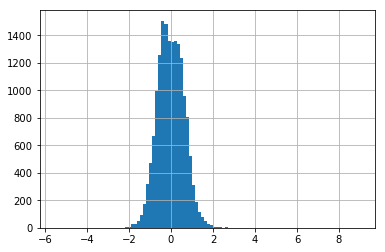

In [39]:
normalized_matrix[normalized_matrix.columns[0]].hist(bins=100)

# Histogram of First Gene

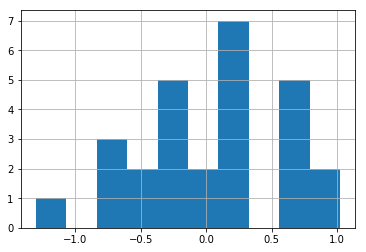

In [40]:
normalized_matrix.loc[normalized_matrix.index[0]].hist()

# Save Filtered Matrix

In [41]:
filename = path+'aba_dev_mic_age_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [42]:
gene_list = mf.createGeneList(normalized_matrix)

In [43]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A4GALT,53947


In [44]:
gene_list.shape

(16827, 2)

# Save Gene List

In [45]:
filename = path+'aba_dev_mic_age_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [46]:
attribute_list = mf.createAttributeList(normalized_matrix)

In [47]:
attribute_list.head()

""
Attributes
1 yrs
10 mos
12 pcw
13 pcw
13 yrs


In [48]:
attribute_list.shape

(27, 0)

# Save Attribute List

In [49]:
filename = path+'aba_dev_mic_age_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [50]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [51]:
standard_matrix.head()

,1 yrs,10 mos,12 pcw,13 pcw,13 yrs,15 yrs,16 pcw,17 pcw,18 yrs,19 pcw,...,3 yrs,30 yrs,36 yrs,37 yrs,4 mos,4 yrs,40 yrs,8 pcw,8 yrs,9 pcw
,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.278591,0.684372,0.165853,-0.352665,-0.130443,0.536224,0.388076,-0.056369,0.610293,0.832520,...,0.758446,0.017705,-0.500813,-0.648962,0.239927,0.091779,-0.723036,-0.871184,-0.797110,-0.945258
A1CF,-0.752235,-0.159642,-0.085568,-0.455938,-0.381864,0.655173,-0.678161,-0.233716,0.803321,0.284802,...,0.358876,0.507025,0.877391,0.136654,0.581094,-0.530012,0.210728,-0.974457,-0.011494,-0.900383
A2M,0.758446,-0.056369,-0.574887,-0.723036,0.017705,0.239927,-0.500813,-0.871184,0.906590,-0.945258,...,0.536224,0.165853,0.314001,0.684372,0.462150,0.610293,-0.278591,-0.426739,-0.130443,-0.797110
A2ML1,0.136654,0.284802,-0.826309,-0.752235,0.432951,-0.085568,-0.678161,-0.530012,0.951469,-0.455938,...,0.581094,0.507025,0.062580,0.803321,0.729247,0.655173,-0.011494,-0.974457,0.210728,-0.900383
A4GALT,0.388076,-0.648962,0.758446,-0.130443,0.165853,0.610293,0.091779,-0.723036,-0.574887,-0.352665,...,-0.871184,0.536224,-0.945258,0.017705,0.684372,0.832520,-0.797110,0.462150,0.314001,-0.056369


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

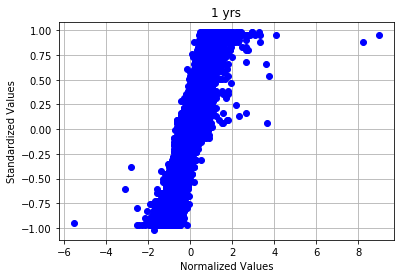

In [52]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [53]:
filename = path+'aba_dev_mic_age_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [54]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [55]:
tertiary_matrix.head()

,1 yrs,10 mos,12 pcw,13 pcw,13 yrs,15 yrs,16 pcw,17 pcw,18 yrs,19 pcw,...,3 yrs,30 yrs,36 yrs,37 yrs,4 mos,4 yrs,40 yrs,8 pcw,8 yrs,9 pcw
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,-1,0,0
A4GALT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [56]:
filename = path+'aba_dev_mic_age_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [57]:
name = 'aba_dev_mic_age_gene_up_set'

In [58]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [59]:
name = 'aba_dev_mic_age_gene_down_set'

In [60]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [61]:
name = 'aba_dev_mic_age_attribute_up_set'

In [62]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [63]:
name = 'aba_dev_mic_age_attribute_down_set'

In [64]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [65]:
attribute_similarity_matix = mf.createSimilarityMatrix(normalized_matrix.T, 'cosine')

In [66]:
attribute_similarity_matix.head()

,1 yrs,10 mos,12 pcw,13 pcw,13 yrs,15 yrs,16 pcw,17 pcw,18 yrs,19 pcw,...,3 yrs,30 yrs,36 yrs,37 yrs,4 mos,4 yrs,40 yrs,8 pcw,8 yrs,9 pcw
,,,,,,,,,,,,,,,,,,,,,
1 yrs,1.000000,0.229255,-0.423971,-0.478731,0.591577,0.699625,-0.456106,-0.436590,0.192221,-0.388758,...,0.222775,0.438414,0.427166,0.337913,0.632003,0.417323,0.257523,-0.313771,0.273767,-0.351622
10 mos,0.229255,1.000000,-0.256588,-0.314539,0.227146,0.243284,-0.328138,-0.235298,0.175985,-0.171132,...,0.364640,0.097261,0.131074,0.240945,0.244659,0.249025,0.285600,-0.188899,0.305381,-0.211706
12 pcw,-0.423971,-0.256588,1.000000,0.902232,-0.610184,-0.424373,0.694538,0.414345,-0.568124,0.398235,...,-0.496080,-0.536674,-0.530075,-0.517889,-0.457627,-0.401587,-0.473109,0.607544,-0.376715,0.507783
13 pcw,-0.478731,-0.314539,0.902232,1.000000,-0.600979,-0.495923,0.749846,0.500732,-0.500583,0.432592,...,-0.492341,-0.492613,-0.468354,-0.541422,-0.444338,-0.415390,-0.501024,0.631531,-0.389277,0.634596
13 yrs,0.591577,0.227146,-0.610184,-0.600979,1.000000,0.590577,-0.556047,-0.467630,0.512272,-0.480985,...,0.423884,0.721612,0.572357,0.594002,0.470386,0.376197,0.563934,-0.399576,0.368592,-0.365811


# Save Attribute Similarity Matrix

In [67]:
filename = path+'aba_dev_mic_age_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

In [68]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

# Create Gene Similarity Matrix

In [69]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [70]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.296422,0.155986,0.194341,-0.108073,0.327260,-0.329756,0.457867,-0.101162,0.066543,...,-0.126302,-0.481792,-0.095622,0.046523,0.145363,0.102294,0.311826,-0.165132,0.104158,-0.256139
A1CF,0.296422,1.000000,0.461106,0.478920,-0.195064,-0.069359,-0.503428,0.047922,0.018994,0.176018,...,-0.342834,-0.377706,-0.339205,0.235242,-0.038463,-0.053572,0.061142,-0.158043,-0.201800,-0.328976
A2M,0.155986,0.461106,1.000000,0.770274,0.114322,0.197028,-0.753855,0.394254,-0.063477,0.440295,...,-0.792678,-0.583132,-0.709951,0.445909,-0.280817,-0.610911,-0.446552,-0.048922,-0.386448,-0.727883
A2ML1,0.194341,0.478920,0.770274,1.000000,-0.165366,0.217371,-0.814640,0.514279,0.127296,0.526037,...,-0.861613,-0.531728,-0.897144,0.509972,0.036919,-0.565189,-0.403580,-0.130150,-0.399338,-0.879274
A4GALT,-0.108073,-0.195064,0.114322,-0.165366,1.000000,-0.085337,0.198501,-0.125821,-0.300537,-0.266760,...,0.197676,0.194871,0.209549,0.115213,-0.541682,-0.057062,-0.136643,0.000742,-0.261128,0.079777


# Save Gene Similarity Matrix

In [71]:
filename = path+'aba_dev_mic_age_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [72]:
name = 'aba_dev_mic_age_gene_attribute_edge_list'

In [73]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  27 Out of 27   

 The number of statisticaly relevent gene-attribute associations is: 27015
